## 前言

### 以下介紹在我們真正的跑模型之前會做的一些步驟，這些步驟有助於幫助我們了解資料的特性，以及後面的建立模型，這些步驟不一定是連續性的，每一步要做甚麼也不是明確的定義，有時會因為後面新發現的議題，回到上一步去做調整，或是去思考加入新的資料等等。

## 目錄

### 0. 資料初步認識 Data Understanding
### 1. 資料擷取 Data Access
### 2. 資料合併 Data Mergeing
### 3. 離群值偵測 Outlier Detection
### 4. 缺失值填補 Data Imputation
## 其他步驟
### 5. 資料視覺化 Data Visualization
#### 前面的步驟多能夠透過視覺化協助及更有效的了解資料
### 6. 特徵工程 Feature Engineering
#### 透過特徵工程，可以著重資料重要的部分，如這筆資料是透過圖片的特徵工程而得到的
### 7. 特徵選擇 Feature Selecction
#### 利用相關係數/模型/預測評估去選擇這要的特徵

### --------------------------------------------------------------------------------------------------------------------------------------------------------------


## 0. 資料初步認識 Data Understanding
### 資料初步認識可以大概的了解這是甚麼型態的資料集，有多少個變數及資料數，以及個別資料的一些特性，有個大概的認識我們的資料以幫助我們後續的處理。
### 此筆範例資料是來自 https://www.kaggle.com/uciml/faulty-steel-plates kaggle的資料集，資料本來是一張張面板缺陷的圖片經過 feature engineering 後算出的各個指標(亮度/圖片大小等)，及記錄面板缺陷的類型，主要的任務是透過這些指標來預測此筆資料的面板缺陷類型，也了解不同指標的重要性。

### 0.1 讀入資料及套件

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv("datasets_2363_3972_faults.csv")

In [8]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


### 0.2 Python panda dataframe 的一些功能

Display number of rows, columns, etc.: df.info()

Get the number of rows: len(df)

Get the number of columns: len(df.columns)

Get the number of rows and columns: df.shape

Get the number of elements: df.size

Get the name of columns: df.columns

Get the descriptive statistics of columns: df.describe()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [10]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [12]:
df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,1


In [79]:
len(df)

1941

In [80]:
len(df.columns)

34

In [81]:
df.shape

(1941, 34)

In [82]:
df.size

65994

In [5]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------


## 1. 資料擷取
### 擷取資料有興趣特定的變數或資料已進行後續不同的處理，也可以利用同樣的概念建立training / testing dataset

### 1.1 column 及 row 的基本擷取
### 選取特定的行(column)

In [52]:
df['X_Minimum']

0         42
1        645
2        829
3        853
4       1289
        ... 
1936     249
1937     144
1938     145
1939     137
1940    1261
Name: X_Minimum, Length: 1941, dtype: int64

In [34]:
df[df.columns[0:7]]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0
...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0


### drop掉特定不要的行(column)

In [53]:
X = df.drop(['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], axis=1)

y = df[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

### 選取特定的列(row)

In [56]:
df[0:5]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


### 選取指定的行(column)與列(row)

### 從label來指定

In [55]:
df.loc[1, ["X_Minimum", "X_Maximum"]]

X_Minimum    645.0
X_Maximum    651.0
Name: 1, dtype: float64

### 從index來指定

In [210]:
df.iloc[:, [0,1]]

,col1,col2
0,True,True
1,True,False


### 1.2 依造特定條件來選取指定資料

In [20]:
df[df["Pastry"]==1]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,16,26,1377748,1377782,257,21,34,31058,91,151,...,0.7059,-0.0559,0.5626,1,0,0,0,0,0,0
154,14,23,1461247,1461302,265,47,56,34055,106,156,...,0.8364,0.0040,0.7833,1,0,0,0,0,0,0
155,13,21,1488612,1488636,105,18,24,13943,120,150,...,0.6667,0.0374,0.3241,1,0,0,0,0,0,0
156,15,24,1620686,1620708,154,20,22,19711,103,156,...,0.5909,0.0000,0.3329,1,0,0,0,0,0,0


### and

In [67]:
df[ (df["Sum_of_Luminosity"]>500) & (df["Sum_of_Luminosity"]<1000)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
518,41,185,2460355,2460408,5357,181,90,764,123,134,...,-0.6319,-0.9989,1.0000,0,0,1,0,0,0,0
762,1182,1185,171874,171878,8,3,4,958,108,135,...,0.2500,-0.0645,0.1262,0,0,0,1,0,0,0
763,804,808,192327,192330,8,4,3,950,105,127,...,-0.2500,-0.0723,0.1262,0,0,0,1,0,0,0
765,1229,1232,224240,224243,6,3,3,718,107,140,...,0.0000,-0.0651,0.1240,0,0,0,1,0,0,0
766,855,861,237729,237731,6,6,2,775,118,136,...,-0.6667,0.0091,0.1262,0,0,0,1,0,0,0


### or

In [35]:
df[ (df["Sum_of_Luminosity"]>500) | (df["Sum_of_Luminosity"]<1000)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_class,TypeOfSteel_A300,TypeOfSteel_A400
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,1,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,1,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,1,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,0,1
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults,0,1
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults,0,1
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults,0,1
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults,0,1


### --------------------------------------------------------------------------------------------------------------------------------------------------------------


## 2. 資料合併 Data Mergeing
### 有時候我們的資料不只儲存在單一個資料集，需要利用merge的方式將它們合併已進行後續的分析，或是我們有時也會利用分群merge的方式，來看個別集群的資料特性。

### 2.1 基本 Row的合併 與 Column的合併

In [13]:
df_rowbind = pd.concat([df, df])
df_rowbind.shape

(3882, 34)

In [14]:
df_colbind = pd.concat([df, df] ,axis=1)
df_colbind.shape

(1941, 68)

In [15]:
df_colbind.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'X_Minimum', 'X_Maximum',
       'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter',
       'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index',

In [87]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

### 2.2 對於 Columns 有條件的合併 (Dummy variable)
### 由於這筆資料集已經將我們的類別變數轉換成Dummy variable合併成一個欄位。，在迴歸分析（線性、羅吉斯…等）中，當自變數為類別變數時，我們都要先進行轉換虛擬變數(Dummy variable)的動作，以人工變數量化類別變數，通常取值為0或1，為了處理方便我們先將處理完的Dummy variable合併成一個欄位。

In [16]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [25]:
df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [18]:
class_name = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']

def class_merge(x, var1, var2, var3, var4, var5, var6, var7, var8):

    if (x[var1]==1) :
        x[var8] = class_name[0]
    elif(x[var2]==1 ):
        x[var8] = class_name[1]
    elif(x[var3]==1 ):
        x[var8] = class_name[2]
    elif(x[var4]==1 ):
        x[var8] = class_name[3]
    elif(x[var5]==1 ):
        x[var8] = class_name[4]
    elif(x[var6]==1 ):
        x[var8] = class_name[5]
    elif(x[var7]==1 ):
        x[var8] = class_name[6]
        
    return x

new_df = df.apply(lambda x: class_merge(x, 'Pastry', 'Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults','Fault_class'), axis=1)
new_df.drop(['Pastry', 'Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], axis=1 , inplace=True)


In [24]:
df[['TypeOfSteel_A300', 'TypeOfSteel_A400']].head()

,TypeOfSteel_A300,TypeOfSteel_A400
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [27]:
TypeOfSteel = ['TypeOfSteel_A300', 'TypeOfSteel_A400']

def TypeOfSteel_merge(x, var1, var2, var3):

    if (x[var1]==1) :
        x[var3] = TypeOfSteel[0]
    elif(x[var2]==1 ):
        x[var3] = TypeOfSteel[1]
        
    return x

new_df = new_df.apply(lambda x: TypeOfSteel_merge(x, 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'TypeOfSteel'), axis=1)
new_df.drop(['TypeOfSteel_A300', 'TypeOfSteel_A400'], axis=1 , inplace=True)


In [28]:
new_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_class,TypeOfSteel
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,TypeOfSteel_A300
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,TypeOfSteel_A300
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,TypeOfSteel_A300
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,TypeOfSteel_A400
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,TypeOfSteel_A400


### 也可以利用同樣的概念創造 Dummy variable 或是不同複雜的變數運算及處理(分群)，這部分有很多不同的處理方式都可以，也可以找找看網路上 Dummy variable 相關的 package 來使用。

In [30]:
def TypeOfSteel_Dummy(x, var1, var2, var3):

    if (x[var1]== 'TypeOfSteel_A300') :
        x[var2] = 1
        x[var3] = 0
        
    elif(x[var1]=='TypeOfSteel_A400' ):
        x[var2] = 0
        x[var3] = 1
        
    return x

df = new_df.apply(lambda x: TypeOfSteel_Dummy(x, 'TypeOfSteel', 'TypeOfSteel_A300', 'TypeOfSteel_A400'), axis=1)
df.drop(['TypeOfSteel'], axis=1 , inplace=True)


In [31]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_class,TypeOfSteel_A300,TypeOfSteel_A400
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,1,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,1,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,1,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,0,1
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,0,1


### 2.3 資料集的合併
### 由於此資料暫時沒有這個需求，假設有另一個資料集記錄了每一個面板缺陷情況的成本

In [38]:
fault_class = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults',"test1","test2","test3"]

In [40]:
fault_cost =pd.DataFrame(fault_class, columns=["y_name"])

In [43]:
len(fault_cost)*10000

100000

In [44]:
range(1,10,2)

range(1, 10, 2)

In [45]:
fault_cost["cost"] = list(range(10000,len(fault_cost)*10000+1,10000))

In [46]:
fault_cost

,y_name,cost
0,Pastry,10000
1,Z_Scratch,20000
2,K_Scatch,30000
3,Stains,40000
4,Dirtiness,50000
5,Bumps,60000
6,Other_Faults,70000
7,test1,80000
8,test2,90000
9,test3,100000


In [48]:
df_cost = df.merge(fault_cost, left_on= "Fault_class", right_on= "y_name")

In [52]:
df_cost.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_class,TypeOfSteel_A300,TypeOfSteel_A400,y_name,cost
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,1,0,Pastry,10000
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,1,0,Pastry,10000
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,1,0,Pastry,10000
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,0,1,Pastry,10000
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,0,1,Pastry,10000


### --------------------------------------------------------------------------------------------------------------------------------------------------------------


### 3. 離群值偵測 Outlier Detection
### 離群值代表著與其他資料對比有著極大的差距，對於我們的後續分析及建模可能產生影響，不過離群值是否應該被排除可能需要再探討，有時候離群值代表著很重要的資訊(機台的故障)，有時則可能是資料收集上的錯誤。
### 以下利用兩種基本的方式介紹如何偵測離群值，網路上也有許多寫好的套件及新的模型可以套用，再處理前也特別注意資料的分配情形，如本資料就不太服從常態分配，也讓outlier的狀況較多，如要保留這些被判斷是outlier的資料可以先進行資料轉換(取log/開更號等等方式)讓資料較接近常態分配。

### 3.1 標準化分數判斷
### 將資料轉成標準化分數或Z分數進行判斷，根據常態分配的性質，約有99%資料的Z分數會落在平均值的3倍標準差之內，因此Z分數大於3或小於-3的數據將視為離群值(可自訂其他數據為切割點)

In [54]:
from sklearn.preprocessing import StandardScaler
X = df.drop("Fault_class", axis=1)
ss = StandardScaler()
scaled_df = ss.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)

### True 表示判斷是 outlier 假設採用整組資料直接刪除的方式 (有一個欄位是True則整個資料移除)

In [55]:
abs_scaled_df = (abs(scaled_df)>3)

In [56]:
all_abs_scaled = abs_scaled_df.any(axis=1)

In [57]:
outlier_index = all_abs_scaled[all_abs_scaled==True]

### 只有有一個變數的分數大於三就判斷此筆資料是離群值，以下驗證第三筆資料可以看出在 "Steel_Plate_Thickness" 時他的標準化分數大於三。

In [67]:
outlier_index.index

Int64Index([   3,    6,   39,   72,   83,  114,  145,  146,  147,  148,
            ...
            1836, 1838, 1839, 1841, 1843, 1846, 1858, 1863, 1868, 1876],
           dtype='int64', length=211)

In [59]:
abs_scaled_df.iloc[range(0,4,1),range(0,13,1)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False


In [14]:
abs_scaled_df.iloc[range(0,4,1),range(13,27,1)]

,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df_no_outlier = df.drop(outlier_index.index)

### 原本的資料數

In [65]:
scaled_df.shape

(1941, 27)

### 處理後的資料數

In [64]:
df_no_outlier.shape

(1730, 28)

### 3.2 盒鬚圖判斷

### Q1向下延伸或Q3向上延伸1.5倍IQR的距離 (IQR=Q3-Q1)，被視為outlier

In [73]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1 

In [74]:
iqr

X_Minimum                1.002000e+03
X_Maximum                8.800000e+02
Y_Minimum                1.711820e+06
Y_Maximum                1.711803e+06
Pixels_Areas             7.380000e+02
X_Perimeter              6.900000e+01
Y_Perimeter              7.000000e+01
Sum_of_Luminosity        7.348900e+04
Minimum_of_Luminosity    4.300000e+01
Maximum_of_Luminosity    1.600000e+01
Length_of_Conveyer       2.920000e+02
Steel_Plate_Thickness    4.000000e+01
Edges_Index              5.134000e-01
Empty_Index              1.858000e-01
Square_Index             4.569000e-01
Outside_X_Index          1.690000e-02
Edges_X_Index            3.882000e-01
Edges_Y_Index            4.032000e-01
Outside_Global_Index     1.000000e+00
LogOfAreas               9.906000e-01
Log_X_Index              5.185000e-01
Log_Y_Index              6.532000e-01
Orientation_Index        8.449000e-01
Luminosity_Index         1.284000e-01
SigmoidOfAreas           7.516000e-01
TypeOfSteel_A300         1.000000e+00
TypeOfSteel_

In [167]:
def detect_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = pd.DataFrame()
    for index,value in enumerate(df.columns):
        outliers[value] = (df.iloc[:,index] < fence_low[index]) | (df.iloc[:,index] > fence_high[index])
    return outliers

In [168]:
X = df.drop(["TypeOfSteel_A300","TypeOfSteel_A400","Fault_class"], axis=1)

In [170]:
outlier_df = detect_outliers(X)
outlier_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### True 表示判斷是 outlier 假設採用整組資料直接刪除的方式 (有一個欄位是True則整個資料移除)

In [171]:
combine_outlier =outlier_df.any(axis=1)

In [172]:
outlier_index = combine_outlier[combine_outlier==True]

In [173]:
df_no_outlier_2 = df.drop(outlier_index.index)

### 原本的資料數

In [174]:
df.shape

(1941, 28)

### 處理後的資料數

In [175]:
df_no_outlier_2.shape

(1117, 28)

### 繪製原本的資料及兩種方式處理後的資料的boxplot，也由於資料本身不服從常態分配，去除掉outlier再繪製boxplot還是會具有outlier但可以看出已經移除較離群的值。

In [176]:
def boxplot_out(s):
    

    fig = plt.figure(figsize=(10, 8))
    sub2 = fig.add_subplot(111)
    sub2.set_title(s +' boxplot')
    plt.boxplot([df[s],df_no_outlier[s],df_no_outlier_2[s]])

    


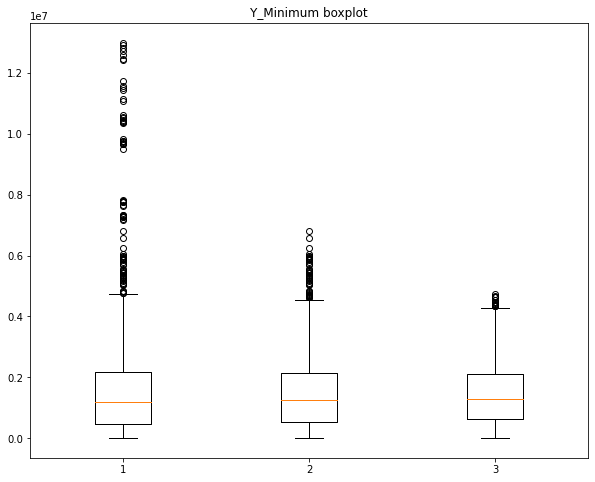

In [177]:
boxplot_out("Y_Minimum")

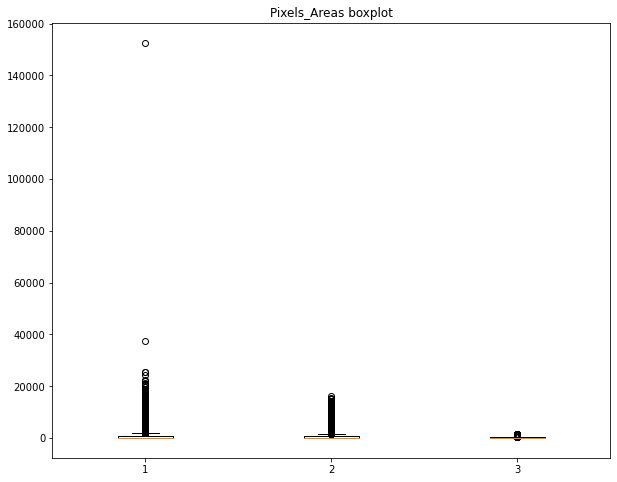

In [113]:
boxplot_out("Pixels_Areas")

### 3.3 將outlier設成NA值，並利用填值的方式處理

In [231]:
X[outlier_df==True] = float("nan")
X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel_A300,TypeOfSteel_A400,Fault_class
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,Pastry
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,Pastry
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,Pastry
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0,1,Pastry
4,1289.0,1306.0,498078.0,498335.0,NaN,60.0,NaN,NaN,37.0,126.0,...,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0,1,Pastry


In [228]:
X[["TypeOfSteel_A300","TypeOfSteel_A400","Fault_class"]] = df[["TypeOfSteel_A300","TypeOfSteel_A400","Fault_class"]]

In [230]:
X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel_A300,TypeOfSteel_A400,Fault_class
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,Pastry
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,Pastry
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,Pastry
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0,1,Pastry
4,1289.0,1306.0,498078.0,498335.0,NaN,60.0,NaN,NaN,37.0,126.0,...,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0,1,Pastry


### 3.4 將Dataframe儲存成csv檔
### 將處理好的資料集儲儲存成csv，之後再利用填值來處理這些outlier

In [234]:
X.to_csv("df_nan.csv",index=False)